In [2]:
#### This notebook addresses the hypothesis that the MTL pretrained models are more robust to pruning than the single-task ones
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the data
mtl_scores = pd.read_csv('models/model_variants/model_score_lookup_multitask.tsv', sep='\t')
single_task_scores = pd.read_csv('models/model_variants/model_score_lookup_singletask.tsv', sep='\t')

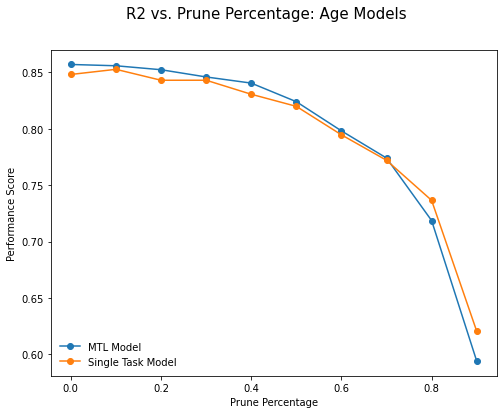

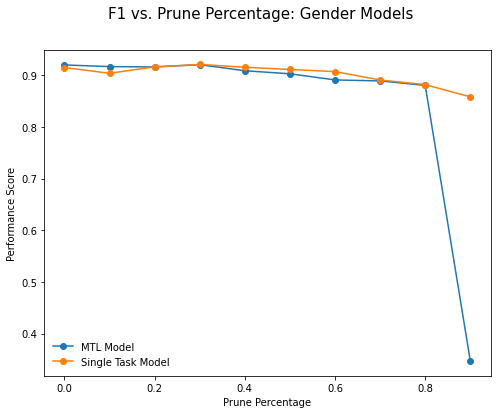

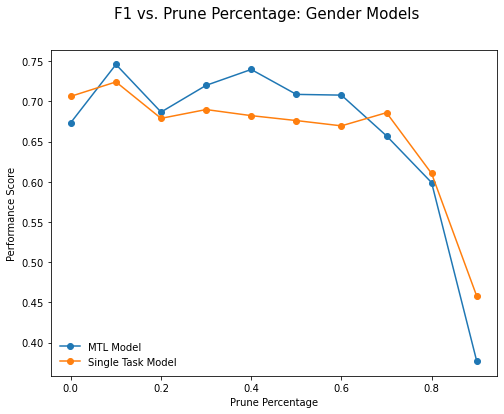

In [4]:
# Generate plots
def plot_robustness(mtl_data, single_data, task, title):
    fig, ax = plt.subplots(1, figsize=(8, 6))
    fig.suptitle(title, fontsize=15)
    
    mtl_x = mtl_data.loc[mtl_data['Task']==task.upper(), 'prune_pct']
    mtl_y = mtl_data.loc[mtl_data['Task']==task.upper(), 'score']
    single_x = single_data.loc[single_data['Task']==task.upper(), 'prune_pct']
    single_y = single_data.loc[single_data['Task']==task.upper(), 'score']
    
    ax.plot(mtl_x, mtl_y, label='MTL Model', marker='o')
    ax.plot(single_x, single_y, label='Single Task Model', marker='o')
    plt.ylabel('Performance Score')
    plt.xlabel('Prune Percentage')
    plt.legend(loc="lower left", frameon=False)
    
    plt.show()

# Age
plot_robustness(mtl_scores.rename(columns={'age_r2':'score'}),
                single_task_scores.rename(columns={'age_r2':'score'}),
                'AGE',
                'R2 vs. Prune Percentage: Age Models')


# Gender
plot_robustness(mtl_scores.rename(columns={'gender_f1':'score'}),
                single_task_scores.rename(columns={'gender_f1':'score'}),
                'GENDER',
                'F1 vs. Prune Percentage: Gender Models')

# Ethnicity
plot_robustness(mtl_scores.rename(columns={'ethnicity_f1':'score'}),
                single_task_scores.rename(columns={'ethnicity_f1':'score'}),
                'ETHNICITY',
                'F1 vs. Prune Percentage: Gender Models')